In [1]:
#1.pre
#1.1 import packages
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os

from matplotlib.colors import ListedColormap

%matplotlib inline

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

In [6]:
#1.2 read files
theft_variable = pd.read_csv('theft.csv')
violence_variable = pd.read_csv('violence.csv')
drugs_variable = pd.read_csv('drugs.csv')

In [7]:
# 2. define corr
theft_variable_corr=theft_variable.corr()
theft_variable_corr

Unnamed: 0  \
Unnamed: 0                                   1.0000   
borough                                      0.9930   
PE_H                                        -0.2023   
ECR                                          0.2955   
Nums_H                                       0.1849   
CRP                                          0.0137   
CWP                                          0.0904   
theft                                        0.3076   

                                            borough  \
Unnamed: 0                                   0.9930   
borough                                      1.0000   
PE_H                                        -0.2526   
ECR                                          0.2823   
Nums_H                                       0.1750   
CRP                                         -0.0593   
CWP                                          0.1084   
theft                                        0.2759   

                                               PE_H  \
Unnamed: 0                                  -0.2023   
borough                                     -0.2526   
PE_H                                         1.0000   
ECR                                         -0.5555   
Nums_H                                      -0.0631   
CRP                                          0.4405   
CWP                                         -0.4117   
theft                                       -0.3257   

                                                ECR  \
Unnamed: 0                                   0.2955   
borough                                      0.2823   
PE_H                                        -0.5555   
ECR                                          1.0000   
Nums_H                                       0.3845   
CRP                                          0.1468   
CWP                                          0.4859   
theft                                        0.6348   

                                             Nums_H  \
Unnamed: 0                                   0.1849   
borough                                      0.1750   
PE_H                                        -0.0631   
ECR                                          0.3845   
Nums_H                                       1.0000   
CRP                                          0.2355   
CWP                                          0.0723   
theft                                        0.2611   

                                                CRP  \
Unnamed: 0                                   0.0137   
borough                                     -0.0593   
PE_H                                         0.4405   
ECR                                          0.1468   
Nums_H                                       0.2355   
CRP                                          1.0000   
CWP                                          0.1092   
theft                                        0.2463   

                                                CWP  \
Unnamed: 0                                   0.0904   
borough                                      0.1084   
PE_H                                        -0.4117   
ECR                                          0.4859   
Nums_H                                       0.0723   
CRP                                          0.1092   
CWP                                          1.0000   
theft                                        0.7992   

                                              theft  
Unnamed: 0                                   0.3076  
borough                                      0.2759  
PE_H                                        -0.3257  
ECR                                          0.6348  
Nums_H                                       0.2611  
CRP                                          0.2463  
CWP                                          0.7992  
theft                                        1.0000

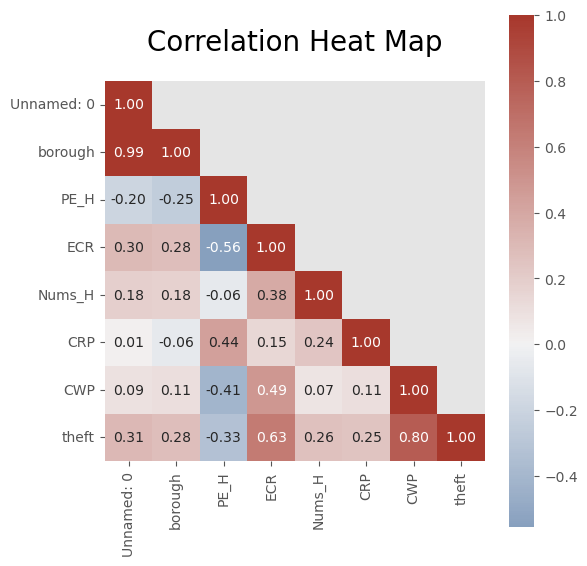

In [27]:
# 2.1 Checking the correlation between the variables
ut = np.triu(theft_variable_corr, k=1) 
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(6, 6))
hm = sns.heatmap(theft_variable_corr, mask=ut, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

figure = hm.get_figure() 
plt.title('Correlation Heat Map',fontsize=20,y=1.06)
plt.tight_layout()
figure.savefig('heatmap_theft.png', dpi=1000)
plt.show();

In [9]:
#3.1 Multiple Linear Regression
regr = sm.formula.ols('theft ~ PE_H + ECR + Nums_H + CRP + CRP', theft_variable).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  theft   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     5.371
Date:                Sun, 11 Dec 2022   Prob (F-statistic):            0.00244
Time:                        22:07:57   Log-Likelihood:                -321.38
No. Observations:                  33   AIC:                             652.8
Df Residuals:                      28   BIC:                             660.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6237   4447.636     -0.029      0.977   -9238.193    8982.946
PE_H        -113.7254    191.648     -0.593      0.558    -506.298     278.847
ECR          767.9589    308.073      2.493      0.019     136.900    1399.018
Nums_H       -13.9302    480.873     -0.029      0.977    -998.954     971.094
CRP            0.0182      0.015      1.219      0.233      -0.012       0.049
==============================================================================
Omnibus:                       44.526   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.624
Skew:                           2.751   Prob(JB):                     6.16e-50
Kurtosis:                      14.600   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#4.1 we do the Hypothesis Testing and p-values
#through analyzing the Correlation between independet variables and dependent variables 
#we found that the correlation coefficient between them are  close to 0, 
#so our real assumption N1: 
#there is no linear relationship between the independent variables and the dependent variable 
#N0: there is a linear relationship between the dependent variables and dependent variables.
regr.pvalues
# we got p > a--- reject N0--- threfore, there is a linear relationship between the dependent variables and dependent varibales???

Intercept                                     0.9773
PE_H                                          0.5577
ECR                                           0.0189
Nums_H                                        0.9771
CRP                                           0.2332
dtype: float64

In [11]:
# 2. define corr
violence_variable_corr=violence_variable.corr()
violence_variable_corr

Unnamed: 0  \
Unnamed: 0                                   1.0000   
borough                                      0.9930   
PE_H                                        -0.2023   
ECR                                          0.2955   
Nums_H                                       0.1849   
CRP                                          0.0137   
CWP                                          0.0904   
violence                                     0.1081   

                                            borough  \
Unnamed: 0                                   0.9930   
borough                                      1.0000   
PE_H                                        -0.2526   
ECR                                          0.2823   
Nums_H                                       0.1750   
CRP                                         -0.0593   
CWP                                          0.1084   
violence                                     0.0566   

                                               PE_H  \
Unnamed: 0                                  -0.2023   
borough                                     -0.2526   
PE_H                                         1.0000   
ECR                                         -0.5555   
Nums_H                                      -0.0631   
CRP                                          0.4405   
CWP                                         -0.4117   
violence                                    -0.0070   

                                                ECR  \
Unnamed: 0                                   0.2955   
borough                                      0.2823   
PE_H                                        -0.5555   
ECR                                          1.0000   
Nums_H                                       0.3845   
CRP                                          0.1468   
CWP                                          0.4859   
violence                                     0.6400   

                                             Nums_H  \
Unnamed: 0                                   0.1849   
borough                                      0.1750   
PE_H                                        -0.0631   
ECR                                          0.3845   
Nums_H                                       1.0000   
CRP                                          0.2355   
CWP                                          0.0723   
violence                                     0.3966   

                                                CRP  \
Unnamed: 0                                   0.0137   
borough                                     -0.0593   
PE_H                                         0.4405   
ECR                                          0.1468   
Nums_H                                       0.2355   
CRP                                          1.0000   
CWP                                          0.1092   
violence                                     0.6945   

                                                CWP  \
Unnamed: 0                                   0.0904   
borough                                      0.1084   
PE_H                                        -0.4117   
ECR                                          0.4859   
Nums_H                                       0.0723   
CRP                                          0.1092   
CWP                                          1.0000   
violence                                     0.5076   

                                           violence  
Unnamed: 0                                   0.1081  
borough                                      0.0566  
PE_H                                        -0.0070  
ECR                                          0.6400  
Nums_H                                       0.3966  
CRP                                          0.6945  
CWP                                          0.5076  
violence                                     1.0000

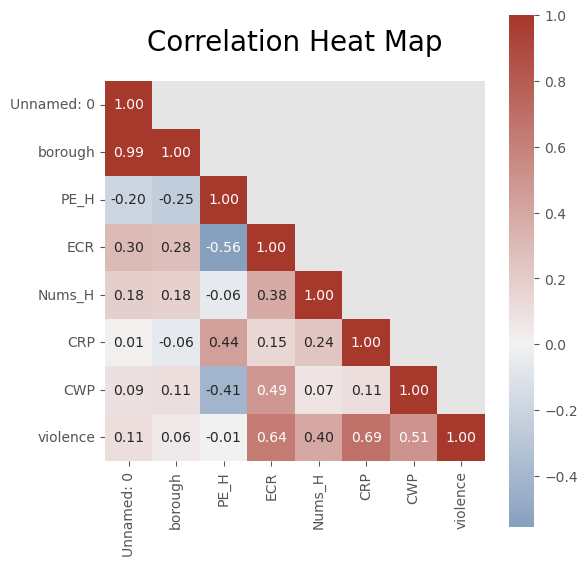

In [28]:
# 2.2 Checking the correlation between the variables 
ut = np.triu(violence_variable_corr, k=1) 
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(6, 6))
hm = sns.heatmap(violence_variable_corr, mask=ut, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

figure = hm.get_figure() 
plt.title('Correlation Heat Map',fontsize=20,y=1.06)
plt.tight_layout()
figure.savefig('heatmap_vio.png', dpi=1000)
plt.show();

In [13]:
#3.2 Multiple Linear Regression
regr = sm.formula.ols('violence ~ PE_H + ECR + Nums_H + CRP + CRP', violence_variable).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               violence   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     25.09
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           6.61e-09
Time:                        22:10:32   Log-Likelihood:                -267.24
No. Observations:                  33   AIC:                             544.5
Df Residuals:                      28   BIC:                             552.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1944.7865    862.272     -2.255      0.032   -3711.070    -178.503
PE_H          16.7446     37.155      0.451      0.656     -59.364      92.853
ECR          259.3346     59.727      4.342      0.000     136.990     381.679
Nums_H        43.2574     93.228      0.464      0.646    -147.711     234.226
CRP            0.0142      0.003      4.933      0.000       0.008       0.020
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.731
Skew:                           0.286   Prob(JB):                        0.694
Kurtosis:                       2.548   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#4. we do the Hypothesis Testing and p-values
#through analyzing the Correlation between independet variables and dependent variables 
#we found that the correlation coefficient between them are  close to 0, 
#so our real assumption N1: 
#there is no linear relationship between the independent variables and the dependent variable 
#N0: there is a linear relationship between the dependent variables and dependent variables.
regr.pvalues
# we got p > a--- reject N0--- threfore, there is a linear relationship between the dependent variables and dependent varibales???

Intercept                                     0.0321
PE_H                                          0.6557
ECR                                           0.0002
Nums_H                                        0.6462
CRP                                           0.0000
dtype: float64

In [15]:
# 2. define corr
drugs_variable_corr=drugs_variable.corr()
drugs_variable_corr

Unnamed: 0  \
Unnamed: 0                                   1.0000   
borough                                      0.9930   
PE_H                                        -0.2023   
ECR                                          0.2955   
Nums_H                                       0.1849   
CRP                                          0.0137   
CWP                                          0.0904   
drugs                                        0.2458   

                                            borough  \
Unnamed: 0                                   0.9930   
borough                                      1.0000   
PE_H                                        -0.2526   
ECR                                          0.2823   
Nums_H                                       0.1750   
CRP                                         -0.0593   
CWP                                          0.1084   
drugs                                        0.2151   

                                               PE_H  \
Unnamed: 0                                  -0.2023   
borough                                     -0.2526   
PE_H                                         1.0000   
ECR                                         -0.5555   
Nums_H                                      -0.0631   
CRP                                          0.4405   
CWP                                         -0.4117   
drugs                                       -0.1945   

                                                ECR  \
Unnamed: 0                                   0.2955   
borough                                      0.2823   
PE_H                                        -0.5555   
ECR                                          1.0000   
Nums_H                                       0.3845   
CRP                                          0.1468   
CWP                                          0.4859   
drugs                                        0.6769   

                                             Nums_H  \
Unnamed: 0                                   0.1849   
borough                                      0.1750   
PE_H                                        -0.0631   
ECR                                          0.3845   
Nums_H                                       1.0000   
CRP                                          0.2355   
CWP                                          0.0723   
drugs                                        0.3747   

                                                CRP  \
Unnamed: 0                                   0.0137   
borough                                     -0.0593   
PE_H                                         0.4405   
ECR                                          0.1468   
Nums_H                                       0.2355   
CRP                                          1.0000   
CWP                                          0.1092   
drugs                                        0.3687   

                                                CWP  \
Unnamed: 0                                   0.0904   
borough                                      0.1084   
PE_H                                        -0.4117   
ECR                                          0.4859   
Nums_H                                       0.0723   
CRP                                          0.1092   
CWP                                          1.0000   
drugs                                        0.7349   

                                              drugs  
Unnamed: 0                                   0.2458  
borough                                      0.2151  
PE_H                                        -0.1945  
ECR                                          0.6769  
Nums_H                                       0.3747  
CRP                                          0.3687  
CWP                                          0.7349  
drugs                                        1.0000

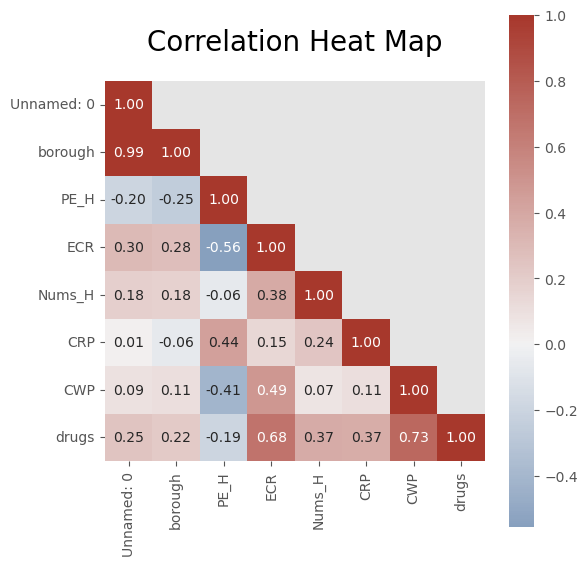

In [29]:
# 2.3 Checking the correlation between the variables
ut = np.triu(drugs_variable_corr, k=1) 
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(6, 6))
hm = sns.heatmap(drugs_variable_corr, mask=ut, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

figure = hm.get_figure() 
plt.title('Correlation Heat Map',fontsize=20,y=1.06)
plt.tight_layout()
figure.savefig('heatmap_drugs.png', dpi=1000)
plt.show();

In [17]:
#3.3 Multiple Linear Regression
regr = sm.formula.ols('drugs ~ PE_H + ECR + Nums_H + CRP + CRP', drugs_variable).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  drugs   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     8.226
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           0.000161
Time:                        22:12:43   Log-Likelihood:                -265.30
No. Observations:                  33   AIC:                             540.6
Df Residuals:                      28   BIC:                             548.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1362.7766    813.004     -1.676      0.105   -3028.139     302.586
PE_H          14.3246     35.032      0.409      0.686     -57.435      86.085
ECR          194.5601     56.314      3.455      0.002      79.206     309.914
Nums_H        45.7283     87.901      0.520      0.607    -134.329     225.785
CRP            0.0035      0.003      1.295      0.206      -0.002       0.009
==============================================================================
Omnibus:                       29.316   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.241
Skew:                           2.046   Prob(JB):                     1.12e-14
Kurtosis:                       8.474   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""